
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Extended Data Figure 1
-----

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
import sys

-----
##### Set up input / output directories

In [2]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Import patients metadata

In [4]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

-----
## Panel a

In [8]:
KZM_age = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_age.tsv'), sep='\t', index_col=0)
KZM_age['Years'] = KZM_age.Age / 365
KZM_age.tail(2)

,Sample_id2,Cohort,Sex,Age,Years
Sample_id,,,,,
IID_H158271_T01_01_WG01,IID_H158271_T01,MSK,Female,408.0,1.117808
IID_H158493_T01_01_WG01,IID_H158493_T01,MSK,Male,5829.0,15.969863


In [5]:
df = px.data.tips()
fig = px.histogram(KZM_age, x="Years", color="Sex", marginal="box",
                   hover_data=KZM_age.columns, width=800, height=400)
fig.update_yaxes(title= 'Samples', row=1, title_font=dict(size=20))
fig.update_xaxes(title= 'Years', row=1, title_font=dict(size=20))
fig.update_layout(legend=dict(x=0, y=1.2, font=dict(size= 20)), legend_orientation="h", yaxis_gridcolor='rgba(189, 195, 199, 1)')
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()
fig.write_image(os.path.join(fig_out, "ExFig_1a.pdf"))

-----
## Panel b

In [15]:
kzm_types = pd.concat([kzm611_md[kzm611_md.Cohort=='KiCS'].Type.value_counts(),
                       kzm611_md[kzm611_md.Cohort=='ZCC'].Type.value_counts(),
                       kzm611_md[kzm611_md.Cohort=='MSK'].Type.value_counts()], axis=1)
kzm_types.columns = ['KiCS', 'ZERO', 'MSK']
kzm_types = kzm_types.fillna(0).astype(int)
kzm_types['Total'] = kzm_types.sum(axis=1)

kzm_types_sorted = kzm_types.sort_values(['Total'], ascending=False)
kzm_types_sorted = kzm_types_sorted.drop(['Total'], axis=1)
kzm_types_sorted.head(10)

,KiCS,ZERO,MSK
Type,,,
NBL,48,23,17
HGG,23,30,1
OST,19,10,15
BALL,21,13,0
EWS,10,18,2
ERMS,15,6,5
DMG,4,22,0
ARMS,9,11,1
WT,12,4,2


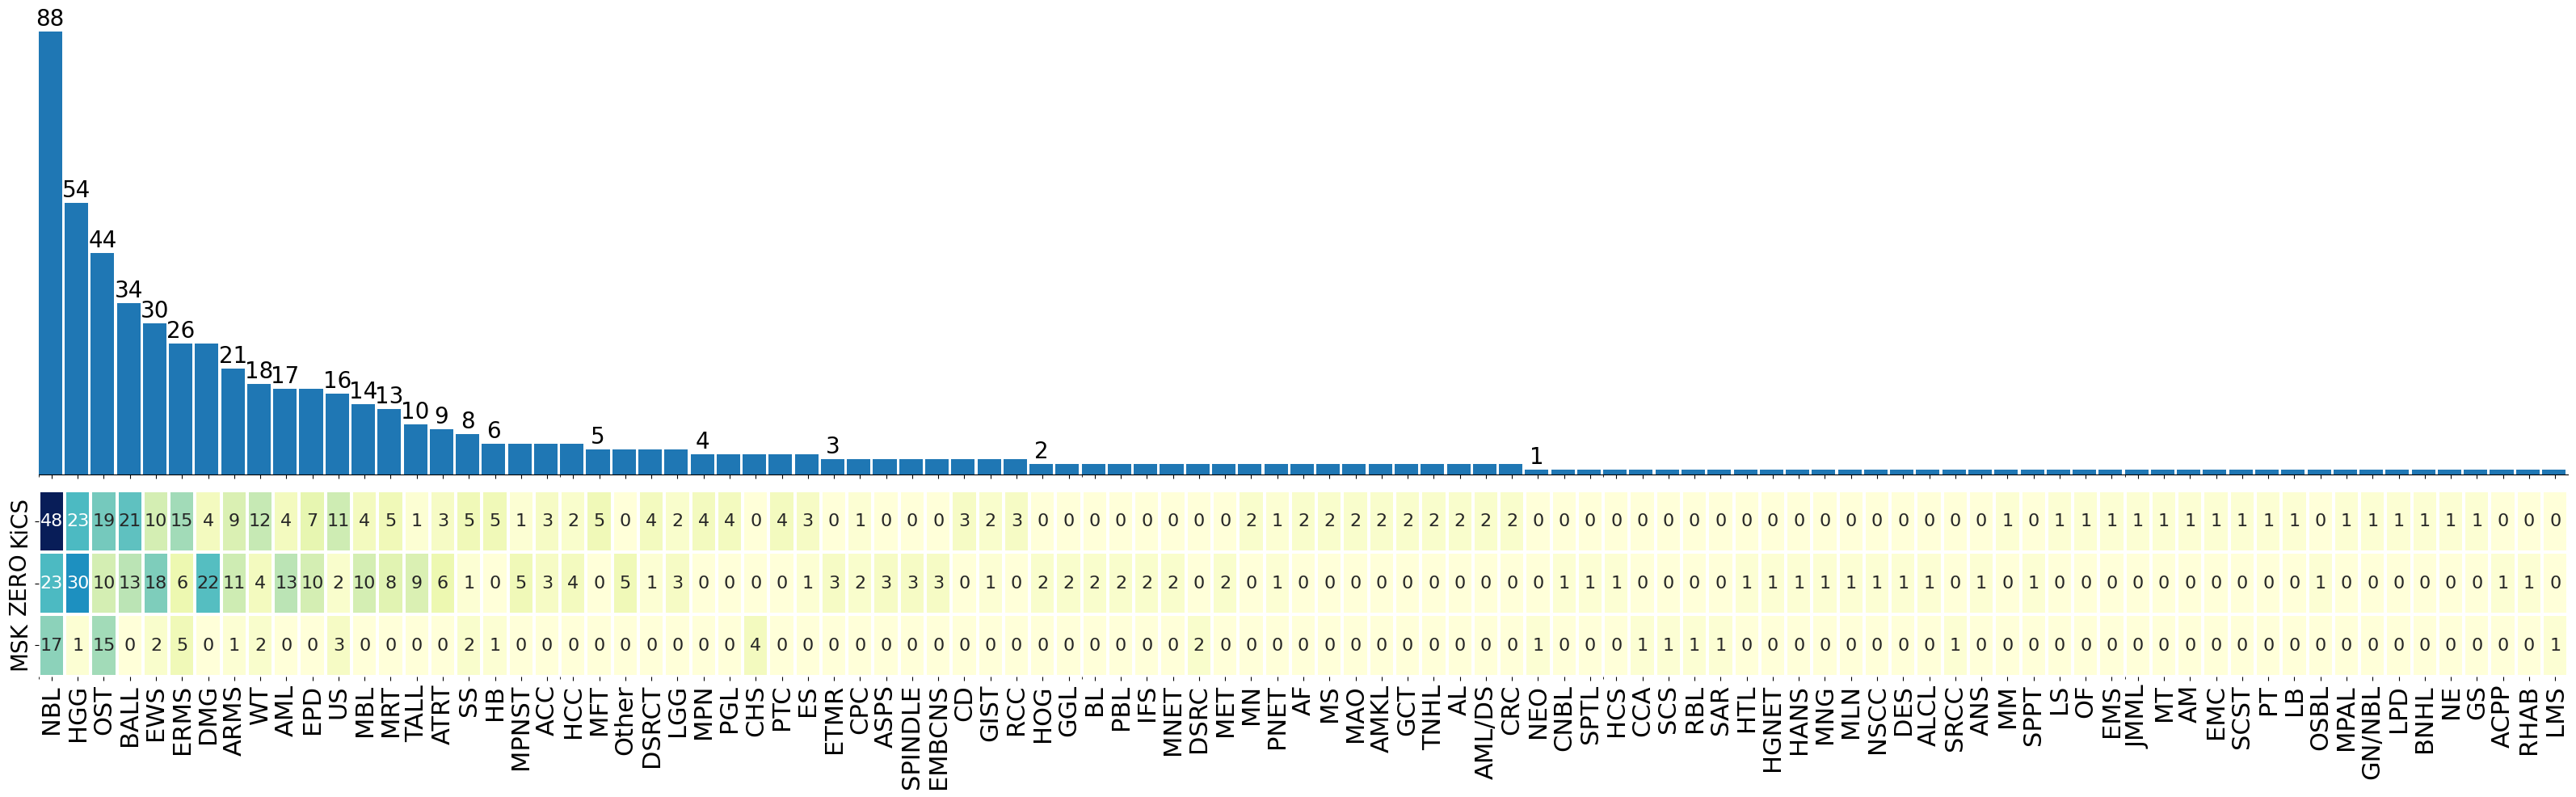

In [18]:
fig, axes = plt.subplots(2,1, figsize=(32, 10), gridspec_kw={'height_ratios': [5, 2]}, sharex=True)

ax1 = kzm611_md.Type.value_counts().plot.bar(width=0.9, align='edge', ax=axes[0])
ax1.set_xlim(-1, len(kzm611_md.Type.value_counts()))
old_value = 0
for rect in ax1.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    if y_value != old_value:
        ax1.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom', size=20)
    old_value = y_value

for spine in ['top', 'right', 'left']:
    ax1.spines[spine].set_visible(False)
ax1.set_yticks([])


ax2 = sns.heatmap(kzm_types_sorted.T, annot=True, fmt="d", cmap="YlGnBu", cbar=False, lw=1.5, ax=axes[1], annot_kws={"fontsize":16})
ax2.set_xticklabels(kzm_types_sorted.index, fontsize=22)
ax2.set_yticklabels(kzm_types_sorted.columns, fontsize=20)
ax2.set_xlabel('')

plt.tight_layout()
plt.savefig(os.path.join(fig_out, 'ExFig_1b.pdf'))

-----
## Panel c

In [ ]:
kzm_dates = pd.read_csv(os.path.join(root_dir, 'source_data/kzm_therapy_days.tsv'), sep='\t', index_col=0)
kzm_dates.head(2)

,Days_from,Therapy_agents_string
KiCS0002_321321,858.0,Etoposide_-_6;;Cisplatin _-_5;;Bleomycin_-_4;;...
KiCS0003_285201,0.0,NaN


In [ ]:
#kzm_dates['Days_from'] = kzm_dates['Days_from'].apply(lambda x : x if x > 0 else 0)
kzm_dates = kzm_dates[kzm_dates.Days_from>0]
kzm_dates['Therapy'] = [kzm611_md.loc[x, 'Therapy'] for x in kzm_dates.index]
kzm_dates['Thr_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in kzm_dates.index]
kzm_dates = kzm_dates[kzm_dates.Therapy=='Post-Therapy']
kzm_dates = kzm_dates.reset_index()
kzm_dates.shape

(207, 5)

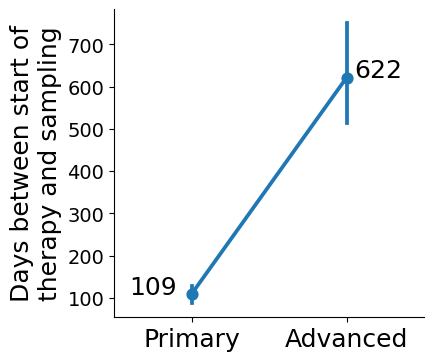

In [ ]:
f, ax = plt.subplots(figsize=(4, 4))

sns.pointplot(data=kzm_dates, x="Thr_State", y="Days_from", order=['Primary-Treated', 'Advanced-Treated'], estimator=np.median)
plt.text(-0.4, kzm_dates[kzm_dates.Thr_State=='Primary-Treated'].Days_from.median(), "%.0f" % kzm_dates[kzm_dates.Thr_State=='Primary-Treated'].Days_from.median(), fontsize=18)
plt.text(1.05, kzm_dates[kzm_dates.Thr_State=='Advanced-Treated'].Days_from.median(), "%.0f" % kzm_dates[kzm_dates.Thr_State=='Advanced-Treated'].Days_from.median(), fontsize=18)

plt.xticks([0,1], ['Primary', 'Advanced'], fontsize=18)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Days between start of\ntherapy and sampling', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

plt.savefig(os.path.join(fig_out, 'ExFig_1c.pdf'), bbox_inches="tight")